In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [5]:
train=pd.read_csv("/content/train.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


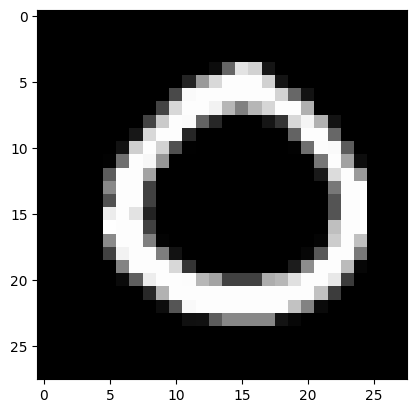

In [6]:
import numpy as np
import matplotlib.pyplot as plt


random_index = np.random.choice(len(train))


random_im = train.iloc[random_index, 1:].values.reshape(28, 28)


plt.imshow(random_im, cmap='gray')
plt.show()



In [9]:
!unzip /content/test.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                


In [11]:
test=pd.read_csv('/content/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('/content/train.csv')
train_labels = train_data['label']
train_images = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0

test_data = pd.read_csv('/content/test.csv')


test_images = test_data.values.reshape(-1, 28, 28, 1) / 255.0


model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history=model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1313/1313 [==============================] - 38s 28ms/step - loss: 0.1834 - accuracy: 0.9431
Epoch 2/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 3/5
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0408 - accuracy: 0.9872
Epoch 4/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0307 - accuracy: 0.9899
Epoch 5/5
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0251 - accuracy: 0.9918
1313/1313 - 11s - loss: 0.0213 - accuracy: 0.9930 - 11s/epoch - 8ms/step

Test accuracy: 0.9929999709129333


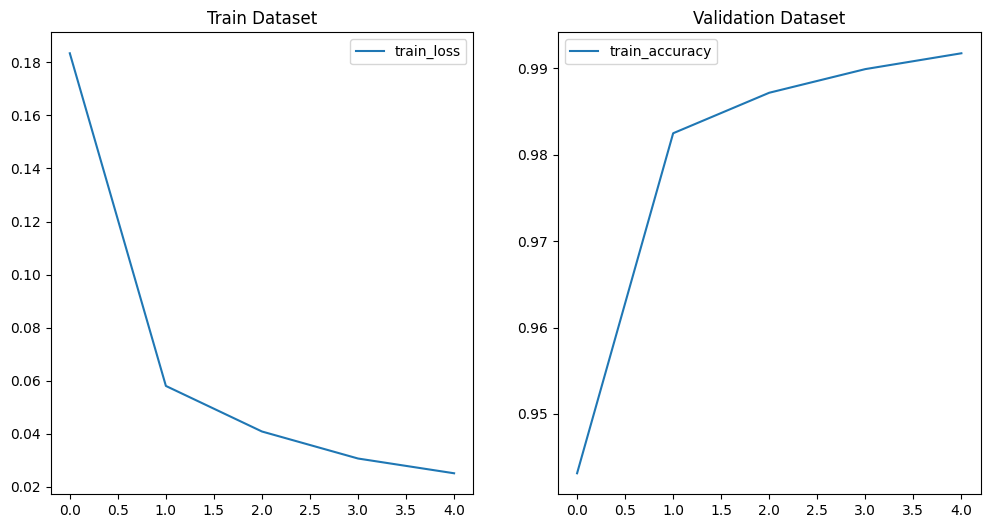

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train Dataset')
plt.plot(history.history['loss'],label='train_loss')

plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Dataset')
plt.plot(history.history['accuracy'],label='train_accuracy')

plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


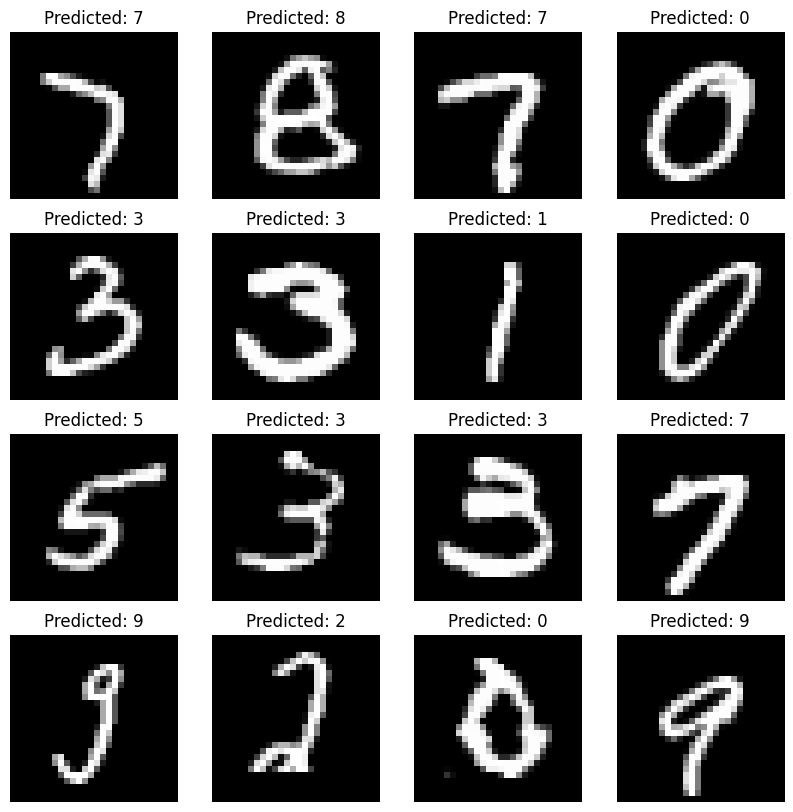

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def display_predictions(model, x_data, num_images=1):
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        idx = np.random.choice(len(x_data))
        img = x_data[idx]
        img_reshaped = img.reshape(1, 28, 28, 1)
        prediction = model.predict(img_reshaped)
        predicted_label = np.argmax(prediction, axis=1)[0]

        plt.subplot(4, 4, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')

    plt.show()

display_predictions(model, test_images, num_images=16)
